# Introduction to neural network classification with Tensorflow

in this notebook we are going to leran how to write neural networks for classification problems/

A classification is where you try to classify something as one thing or another 

A few types of classification problems:
* Binary Classification
* Multiclass classification
* Multilabel classification 

# Creating data to view and fit 

In [1]:
from sklearn.datasets import make_circles

n_samples =1000

X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
# check the features 
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hard to understand right now...lets visualize it!

In [4]:
import pandas as pd 

circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


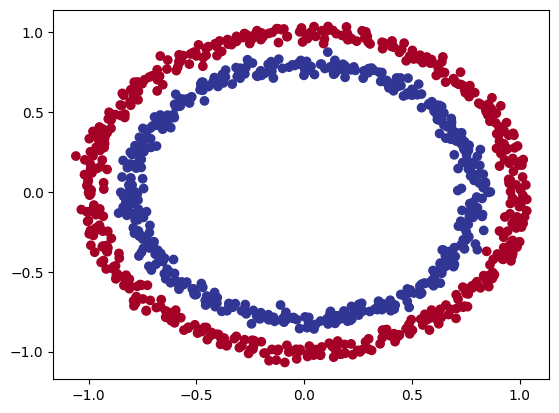

In [5]:
# visualize with a plot 

import matplotlib.pyplot as plt 

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu) # type: ignore

## Input and output shapes

In [6]:
X.shape,y.shape


((1000, 2), (1000,))

## Steps in modelling
The steps in modelling with Tensorflow are typically:
1. Create or import a model
2. Compile the model
3. fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [7]:
import tensorflow as tf # type:ignore

tf.random.set_seed(42)

# Creating a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compiling a model
model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                )
# fitting a model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 3ms/step - loss: 0.9260 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.4630
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4500
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4740
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4760


In [8]:
# Lets try and improve our model by training longer 
model_1.fit(X,y,epochs=200)


Epoch 1/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4860
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4960
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4610
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4760
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4750
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5030
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4950
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4780
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4830
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4790
Epoch 11/

In [9]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [10]:
# Lets add an extra layer 

tf.random.set_seed(42)

# creating a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])
# compiling a model
model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                )
# fit a model
model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4328 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4670
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4630
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4980
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5090
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4960
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4740
Epoch 11/

In [11]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4390


[0.693306565284729, 0.4390000104904175]

## Improving our model

lets looks into our bag of tricks to see how we can improve our model 

1. create a model -we might to add more layers or increase the numbers of hidden units within a layers.
2. Compilling a model - here we might to choose a different 
3. fitting a model - perhaps we might fit our model for more epochs 

In [12]:
# set the random seed 
tf.random.set_seed(42)

# create the model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )
# fit the model
history = model_3.fit(X,y,epochs=100)



Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 2.5745 - accuracy: 0.4560
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7057 - accuracy: 0.5010
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5080
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.4930
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4620
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5130
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5210
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4800
Epoch 11/

In [13]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5070


[0.6966263651847839, 0.5070000290870667]

In [14]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


<Axes: >

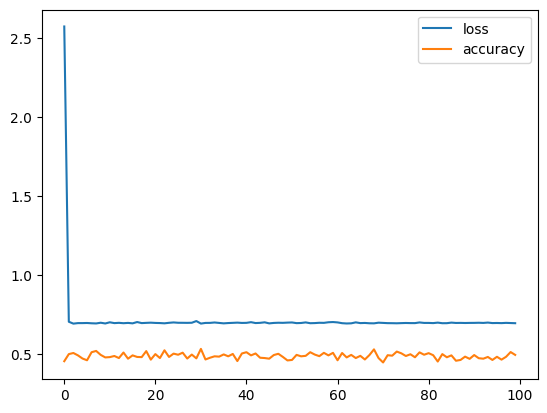

In [15]:
pd.DataFrame(history.history).plot() 

# To visualize our models predictions lets create a function plot_decision_boundary() , this function will:

* Take in a trained model,features (X) and labels(y)
* create a meshgrid of the differnt X values 
* Make predictions across the meshgrid
* Plot the predictions as well as line between zones 

In [16]:
import numpy as np #type:ignore

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7) # type: ignore
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu) # type: ignore
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 955us/step
doing binary classifcation...


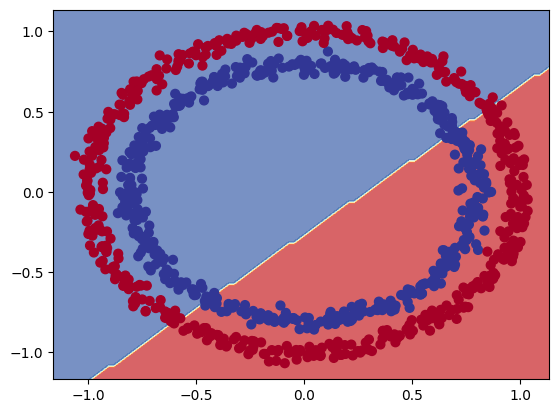

In [17]:
# Check out the predictions our model is making 
plot_decision_boundary(model_3,X=X,y=y)


In [18]:
tf.random.set_seed(42)
 
# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

Oh wait .  we compiled our model for binary classification problem.
But .. we're now working on a regression problem , lets change the model to suit our data.

In [19]:
# setup random seed
tf.random.set_seed(42)

# Create the model 
model_3  = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model 
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae']
                )

# fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis = -1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 553.1210 - mae: 553.1210
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 434.2828 - mae: 434.2828
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 319.7244 - mae: 319.7244
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 200.1196 - mae: 200.1196
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 78.8940 - mae: 78.8940
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 75.0250 - mae: 75.0250
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 90.1974 - mae: 90.1974
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 60.8110 - mae: 60.8110
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0531 - mae: 47.0531
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 53.0252 - mae: 53.0252
Epoch 11/100
5/5 [==============================] -

In [20]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


2/2 [==============================] - 0s 2ms/step


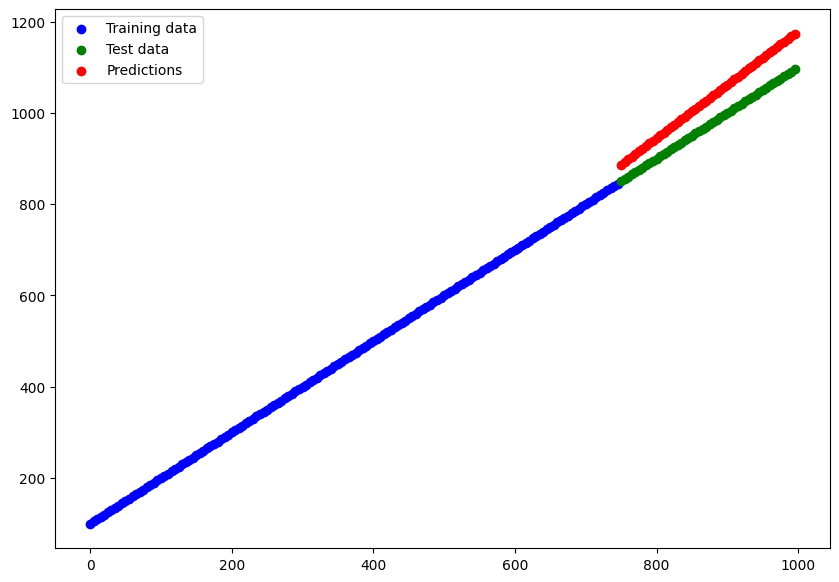

In [21]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize= (10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label = 'Training data')
plt.scatter(X_reg_test,y_reg_test,c='g',label ='Test data')
plt.scatter(X_reg_test,y_reg_preds,c='r',label='Predictions')
plt.legend()


The missing piece is Non-linearity

In [22]:
#  set the random seed 
tf.random.set_seed(42)

# create the model 
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(lr =0.001),
                  metrics =['accuracy']
                  )

# fit the model
history = model_4.fit(X,y,epochs =100)


Epoch 1/100


c:\Users\admin\miniconda3\envs\tf_dml\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 0s 3ms/step - loss: 4.2975 - accuracy: 0.4110
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2436 - accuracy: 0.4080
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1930 - accuracy: 0.4180
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1770 - accuracy: 0.4210
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1283 - accuracy: 0.4260
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0682 - accuracy: 0.4360
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0620 - accuracy: 0.4390
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0296 - accuracy: 0.4410
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0188 - accuracy: 0.4430
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9757 - accuracy: 0.4450
Epoch 11/100
32/32 [=

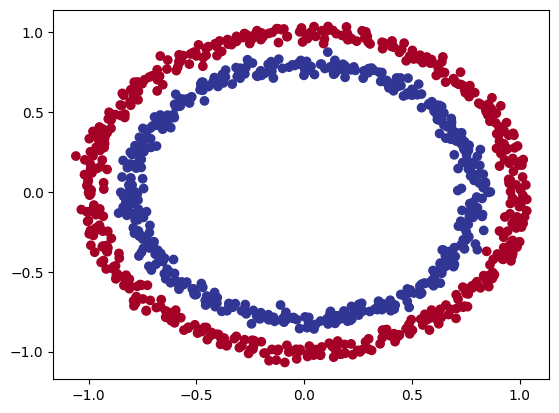

In [23]:
#  check out our data 

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu) # type: ignore

313/313 [==============================] - 0s 888us/step
doing binary classifcation...


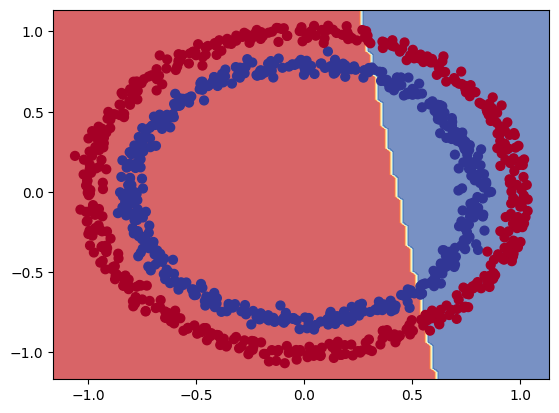

In [24]:
# check the decision boundary for model 
plot_decision_boundary(model=model_4,X=X,y=y)

lets build our neural network with a non linear activation function

In [25]:
tf.random.set_seed(42)

# create the model 
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.relu)
])

# Compile the model
model_5.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(lr =0.001),
                  metrics =['accuracy']
                  )

# fit the model
history = model_5.fit(X,y,epochs =100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1874 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1494 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1177 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1095 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0895 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0746 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0726 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0714 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0707 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0698 - accuracy: 0.4830
Epoch 11/

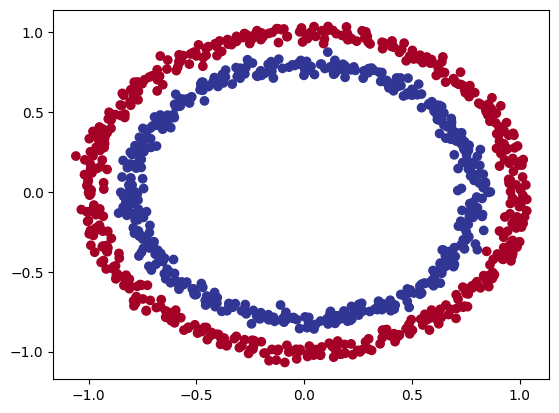

In [26]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu) #type:ignore

313/313 [==============================] - 0s 867us/step
doing binary classifcation...


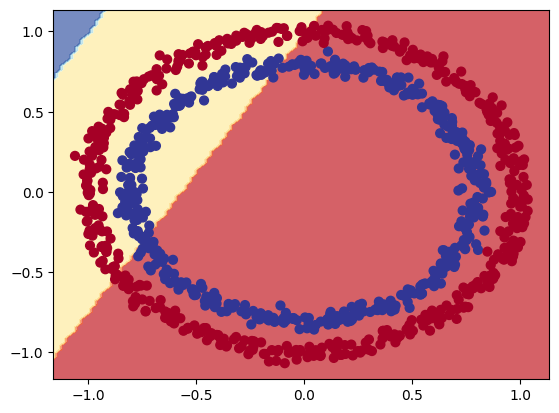

In [27]:
plot_decision_boundary(model=model_5,X=X,y=y)

In [28]:
# time to replicate the multi layer neural network from tensorflow playground 

# set random seed 
tf.random.set_seed(42)

# create the model 
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1),
])

# compile the model
model_6.compile(loss ='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr =0.001),
                metrics=['accuracy'])

# fit the model
history = model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 3ms/step - loss: 3.0790 - accuracy: 0.4820
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 2.2418 - accuracy: 0.4680
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 1.1248 - accuracy: 0.3980
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0719 - accuracy: 0.3900
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0370 - accuracy: 0.3970
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0081 - accuracy: 0.3960
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9837 - accuracy: 0.4000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9609 - accuracy: 0.4000
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9409 - accuracy: 0.3940
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9212 - accuracy: 0.3920
Epoch 11/

In [29]:
# evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9950


[0.034321460872888565, 0.9950000643730164]

313/313 [==============================] - 0s 981us/step
doing binary classifcation...


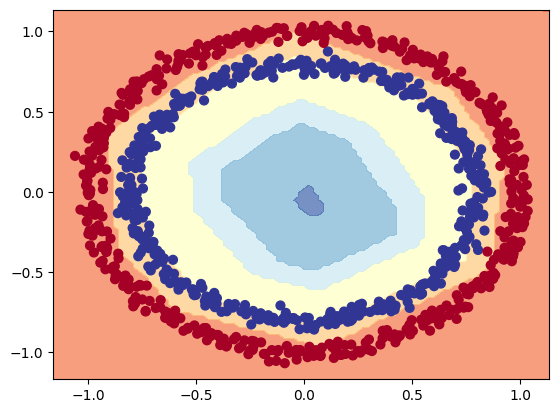

In [30]:
plot_decision_boundary(model_6,X,y)

In [31]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

# compile the model 
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy']
                )

# fit the model
history = model_7.fit(X,y,epochs =100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4990
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4970
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5090
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5110
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5120
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5060
Epoch 11/

In [32]:
# evaluate our model 
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7300


[0.5618773102760315, 0.7300000190734863]

313/313 [==============================] - 0s 950us/step
doing binary classifcation...


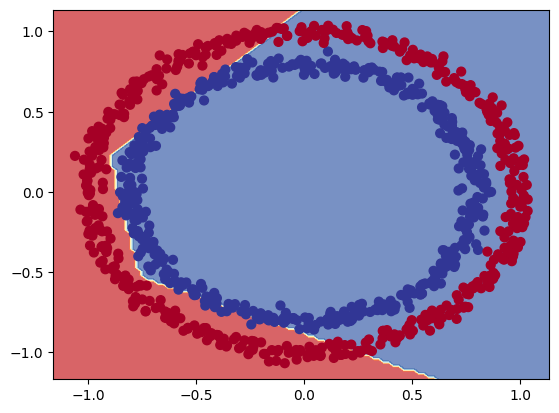

In [33]:
# lets visualize our model
plot_decision_boundary(model_7,X,y)

In [34]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

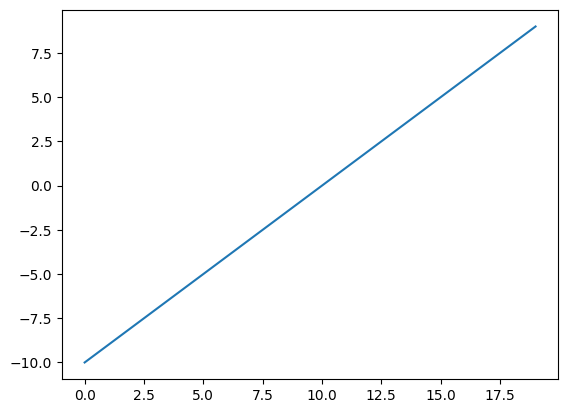

In [35]:
plt.plot(A) #type:ignore

In [36]:
#  lets start by replacing sigmoid  - sigmoid(x) = 1/(1 + exp(-x))

def sigmoid(x):
    return 1/(1+tf.exp(-x))

# use the sigmoid function on our toy tensor 
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397865e-05, 1.2339462e-04, 3.3535017e-04, 9.1105100e-04,
       2.4726237e-03, 6.6928510e-03, 1.7986210e-02, 4.7425877e-02,
       1.1920293e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330711e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

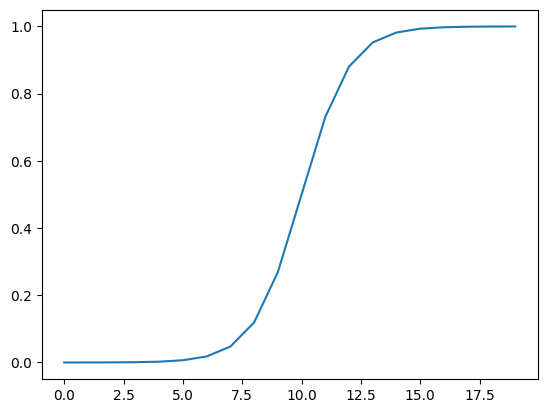

In [37]:
# plot our toy tensor tranformed by sigmoid 
plt.plot(sigmoid(A))

In [38]:
# lets recreate the relu function 
def relu(x):
    return tf.maximum(0,x)


In [39]:
# pass the toy tensor to custom relu functiion 
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

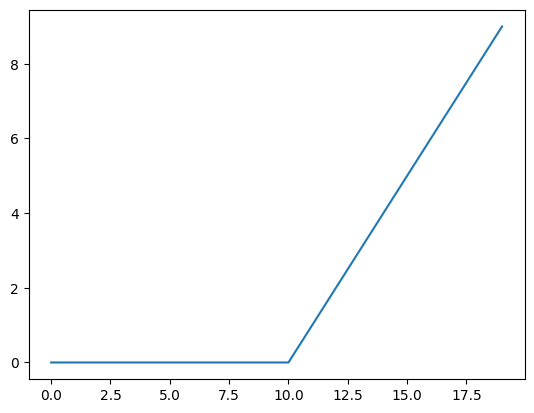

In [40]:
#  lets plot our relu funtion 
plt.plot(relu(A)) #type:ignore

In [41]:
# lets try linear activation function 

def linear(x):
    return x

# lets pass values to function 
linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

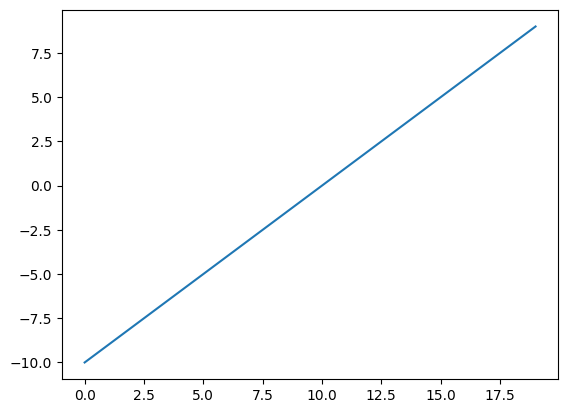

In [42]:
# lets plot linear function 
plt.plot(linear(A))  # type: ignore

# Evaluating and improving our classifiaction model

In [43]:
# check how many examples we have 
len(X)

1000

In [44]:
X_train ,y_train = X[:800] , y[:800]
X_test,y_test = X[800:] ,y[800:]

X_train.shape ,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [45]:
# set random seed 
tf.random.set_seed(42)

# create the model 
model_8 =tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

# compile the model 
model_8.compile(loss ='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr =0.01),
                metrics=['accuracy'])

# fit the model
history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5450
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5600
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5763
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6200
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.6513
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6417 - accuracy: 0.6513
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6273 - accuracy: 0.6625
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6114 - accuracy: 0.6987
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.7025
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.7375
Epoch 11/25
25/25 [

In [46]:
# Evaluate the model on test dataset 
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.9550


[0.30011385679244995, 0.9549999833106995]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


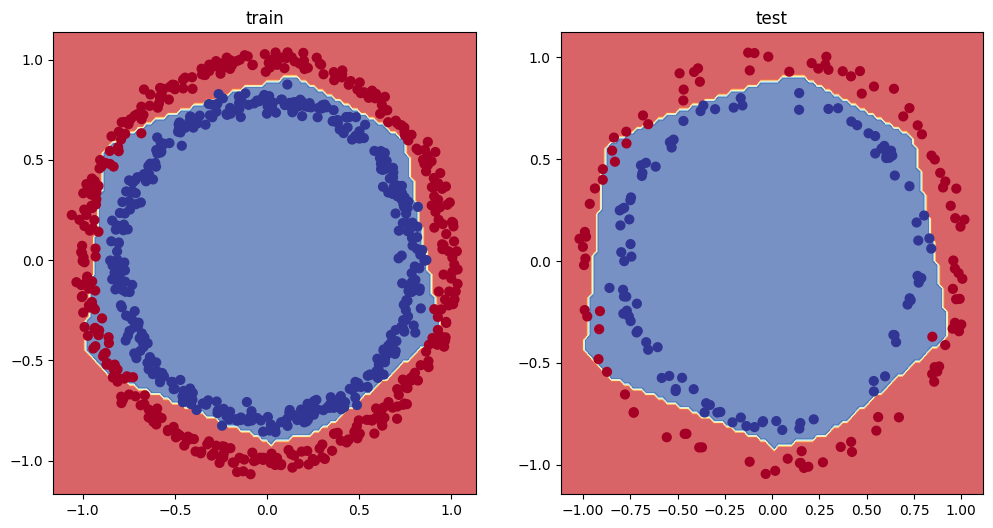

In [47]:
# plot the decision boundaries for the training and test sets 

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')

plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_8,X_test,y_test)


In [48]:
history.history

{'loss': [0.6878460049629211,
  0.6825068593025208,
  0.6761888265609741,
  0.6693388819694519,
  0.6538045406341553,
  0.6416955590248108,
  0.6273320913314819,
  0.6114376187324524,
  0.6027072072029114,
  0.5725527405738831,
  0.5467603206634521,
  0.5221964120864868,
  0.49735477566719055,
  0.4734266698360443,
  0.4508771300315857,
  0.4262755215167999,
  0.4100947082042694,
  0.3935506045818329,
  0.3737815320491791,
  0.35776495933532715,
  0.3417726755142212,
  0.32723942399024963,
  0.31794384121894836,
  0.3114161491394043,
  0.2964320182800293],
 'accuracy': [0.5450000166893005,
  0.5600000023841858,
  0.5762500166893005,
  0.6200000047683716,
  0.6512500047683716,
  0.6512500047683716,
  0.6624999642372131,
  0.6987499594688416,
  0.7024999856948853,
  0.737500011920929,
  0.7674999833106995,
  0.7887499928474426,
  0.8037499785423279,
  0.8174999952316284,
  0.8149999976158142,
  0.8374999761581421,
  0.8262499570846558,
  0.8237499594688416,
  0.8524999618530273,
  0.8374

In [49]:
# convert the  history into a dataframe 

pd.DataFrame(history.history)

,loss,accuracy
0,0.687846,0.54500
1,0.682507,0.56000
2,0.676189,0.57625
3,0.669339,0.62000
4,0.653805,0.65125
5,0.641696,0.65125
6,0.627332,0.66250
7,0.611438,0.69875
8,0.602707,0.70250
9,0.572553,0.73750


<Axes: >

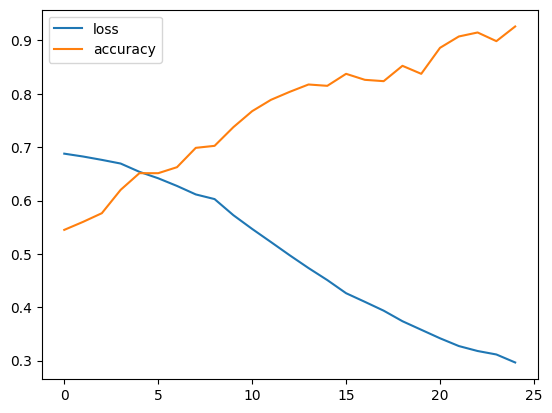

In [50]:
pd.DataFrame(history.history).plot()

## Finding the best learning rate 

To find the ideal lerning rate we're going to use the following steps:
* A learning rate **callback** - yoou can think of callback as extra piece of funtionality ,you can add to your *while* its training.
* A modified loss curves plot 

In [51]:
# set random seed
tf.random.set_seed(42)

# create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile the model
model_9.compile(loss ='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# create a learning rate callback 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model 
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs =100,
                        callbacks =[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.5188 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7058 - accuracy: 0.5138 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.5150 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7049 - accuracy: 0.5163 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7044 - accuracy: 0.5175 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.5188 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.5125 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5125 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

<Axes: >

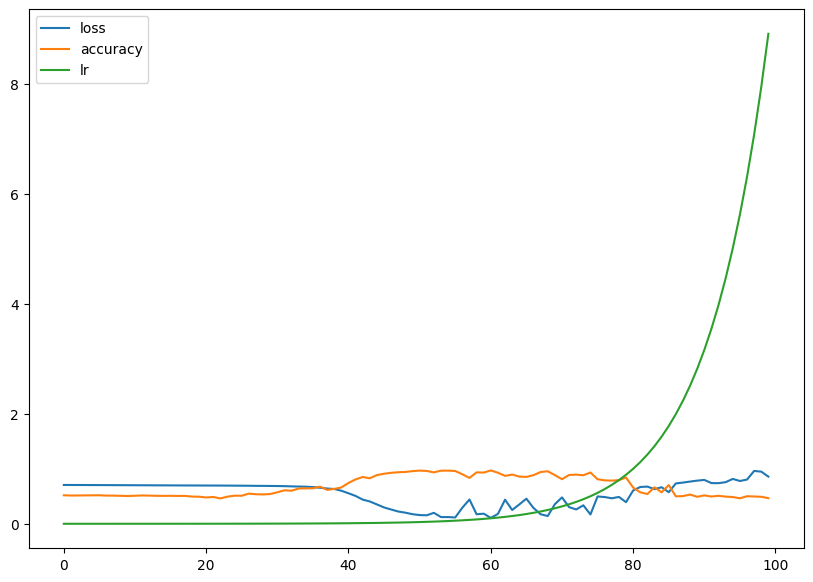

In [52]:
# checkout the history 
pd.DataFrame(history_9.history).plot(figsize=(10,7))

In [53]:
# plot the learning rate verus and the loss

lrs = 1e-4 *(10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [54]:
len(lrs)

100

Text(0.5, 1.0, 'learning rate vs loss')

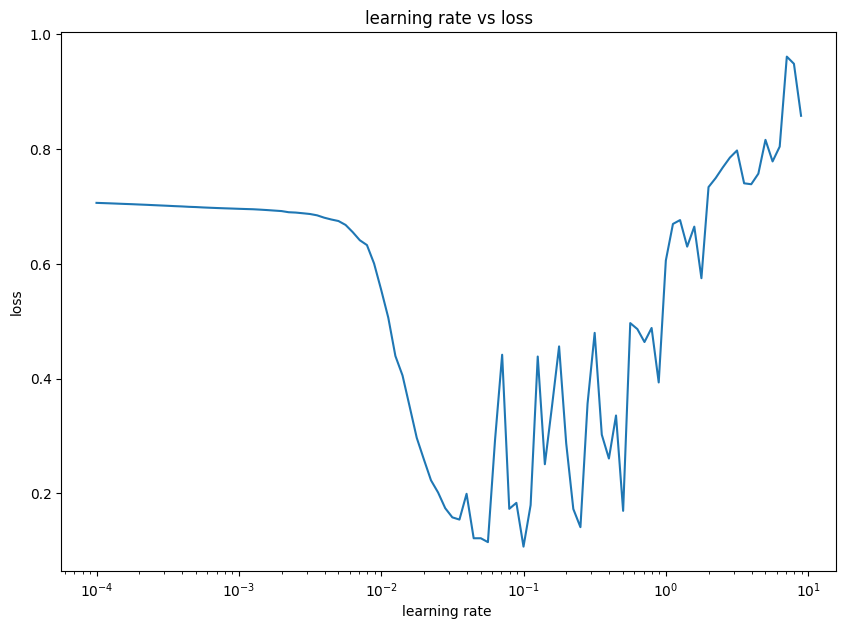

In [55]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history['loss'])
plt.xlabel('learning rate ')
plt.ylabel('loss')
plt.title('learning rate vs loss')

In [56]:
# set up random seed 
tf.random.set_seed(42)

# create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile the model
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics = ['accuracy'])

# fit the model
history_10 = model_10.fit(X_train ,y_train ,epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.4850
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5263
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5512
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.5737
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.5637
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6430 - accuracy: 0.6262
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.6975
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.6987
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.7625
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.8225
Epoch 11/20
25/25 [

In [57]:
# evaluate model 10 on test dataset 
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9500


[0.15097522735595703, 0.949999988079071]

In [58]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3001 - accuracy: 0.9550


[0.30011385679244995, 0.9549999833106995]

313/313 [==============================] - 0s 977us/step
doing binary classifcation...
313/313 [==============================] - 0s 981us/step
doing binary classifcation...


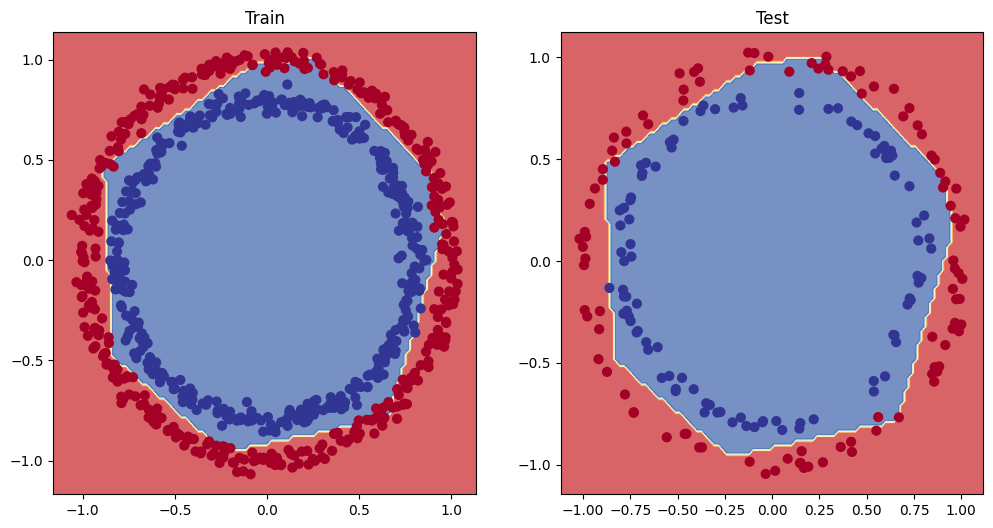

In [59]:
# plot the decision boundaries for the training and test sets 

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10,X_test,y_test)


##

## More classification evaluation methods 

Alongside visualizing our models results as mucch as possible ,
there are a handfu; of other classification evaluation methods & metircs you should be familiar with :
* Accuracy
* precision
* Recall 
* F1-score
* Confusion matrix
* classification report 

In [61]:
# Check the accuracy of our model 
loss ,accuracy = model_10.evaluate(X_test,y_test)
print(f'Model loss on the test set:{loss}')
print(f'Model accuraccy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9500
Model loss on the test set:0.15097522735595703
Model accuraccy on the test set: 95.00%


## Confusion matrix

In [64]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model_10.predict(X_test)

# create confusion matrix 
# confusion_matrix(y_test,y_preds)
y_preds[0] , y_test[0] 


7/7 [==============================] - 0s 1ms/step


(array([0.80344456], dtype=float32), 1)

Oops.. looks like our predictions array has come out in **prediction probability** form the standard putput from the sigmoid or softmax ativationi functions

In [65]:
# Convert prediction probavilites to binarry fromat and view the first 10 values

tf.round(y_preds)[:10] # type: ignore


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [66]:
# Confusion matrix 
confusion_matrix(y_test,tf.round(y_preds))


array([[92,  9],
       [ 1, 98]], dtype=int64)

How about we prettify our confusion matrix

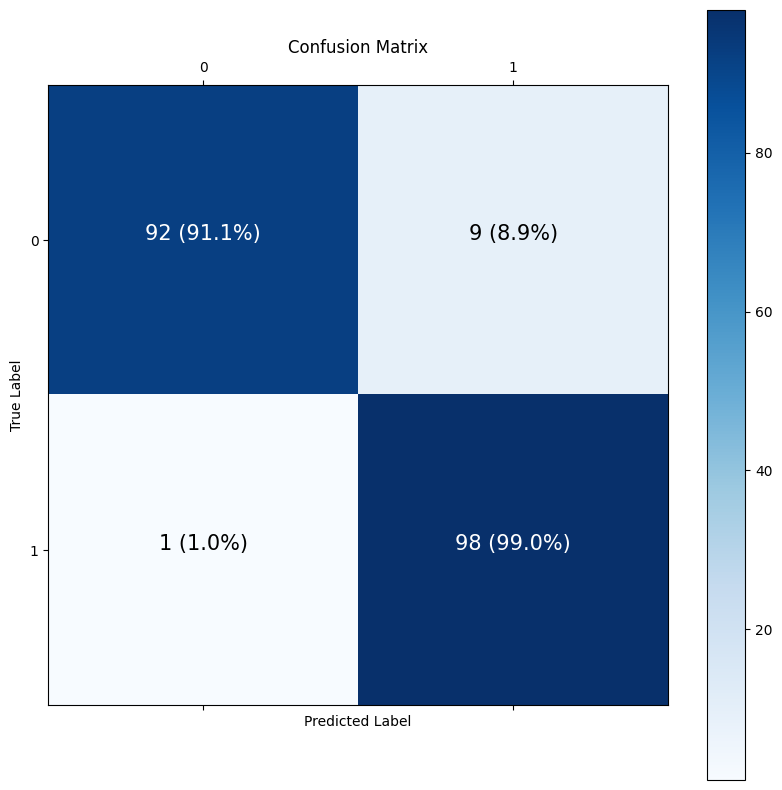

In [72]:
import itertools

figsize = (10,10)

# create the confusion_matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype('float')/cm.sum(axis =-1)[:,np.newaxis]
n_classes = cm.shape[0]

# lets prettify it 
fig ,ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm,cmap =plt.cm.Blues) # type: ignore
fig.colorbar(cax)

# Create classes
classes =False

if classes:
    labels=classes
else:labels =np.arange(cm.shape[0])

# lable the axes
ax.set(title ='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel= 'True Label',
       xticks =np.arange(n_classes),
       yticks =np.arange(n_classes),
       xticklabels =labels,
       yticklabels =labels)

# set threshold for different colors
threshold = (cm.max()+cm.min()) /2.

# plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])): # type: ignore
    plt.text(j , i,f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
             horizontalalignment ='center',
             color ='white' if cm[i,j] >threshold else 'black',
             size =15
             )


## Working with larger example (multiclass classification problem)

When you have more than two classes as an option , its known as **multi-class classification**
* This means if you have 3 differnt classes its multi-class classification.
* it also  means if you have 100 differnt classes its multi-class classification.

To practise multi-class classification , were going to build a neural network to classify images of differnt items of clothing 

for code check clothes.ipynb